# BTM710 - Final Paper
## Gun Violence in Toronto: Analyzing the Spatial and Temporal Pattern

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

#### Import Data

In [2]:
path = 'data.csv'

In [3]:
df_shooting=pd.read_csv(path)

In [7]:
df_shooting.head()

OBJECTID EVENT_UNIQUE_ID             OCC_DATE  OCC_YEAR OCC_MONTH  \
0         1   GO-2004133803  1/1/2004 5:00:00 AM      2004   January   
1         2   GO-2004120070  1/3/2004 5:00:00 AM      2004   January   
2         3   GO-2004135509  1/4/2004 5:00:00 AM      2004   January   
3         4   GO-2004126451  1/5/2004 5:00:00 AM      2004   January   
4         5   GO-2004139160  1/6/2004 5:00:00 AM      2004   January   

    OCC_DOW  OCC_DOY  OCC_DAY  OCC_HOUR OCC_TIME_RANGE  ... DEATH  INJURIES  \
0  Thursday        1        1         0          Night  ...     0         1   
1  Saturday        3        3         1          Night  ...     0         0   
2    Sunday        4        4         4          Night  ...     0         2   
3    Monday        5        5        13      Afternoon  ...     0         1   
4   Tuesday        6        6        19        Evening  ...     0         0   

   HOOD_158          NEIGHBOURHOOD_158 HOOD_140          NEIGHBOURHOOD_140  \
0        23  Pelmo Park-Humberlea (23)       23  Pelmo Park-Humberlea (23)   
1       NSA                        NSA      NSA                        NSA   
2        78  Kensington-Chinatown (78)       78  Kensington-Chinatown (78)   
3       124         Kennedy Park (124)      124         Kennedy Park (124)   
4       146         Malvern East (146)      132              Malvern (132)   

  LONG_WGS84  LAT_WGS84             x             y  
0 -79.538218  43.733742 -8.854154e+06  5.424330e+06  
1   0.000000   0.000000  6.330000e-09  5.660000e-09  
2 -79.399163  43.656119 -8.838674e+06  5.412379e+06  
3 -79.256039  43.732900 -8.822742e+06  5.424200e+06  
4 -79.207412  43.801802 -8.817329e+06  5.434822e+06  

[5 rows x 21 columns]

In [8]:
df_shooting.columns

Index(['OBJECTID', 'EVENT_UNIQUE_ID', 'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH',
       'OCC_DOW', 'OCC_DOY', 'OCC_DAY', 'OCC_HOUR', 'OCC_TIME_RANGE',
       'DIVISION', 'DEATH', 'INJURIES', 'HOOD_158', 'NEIGHBOURHOOD_158',
       'HOOD_140', 'NEIGHBOURHOOD_140', 'LONG_WGS84', 'LAT_WGS84', 'x', 'y'],
      dtype='object')

In [9]:
# # drop columns 
# df=df_shooting.drop(['OBJECTID', 'EVENT_UNIQUE_ID','x', 'y', 'NEIGHBOURHOOD_140', 'HOOD_140', 'LONG_WGS84', 'LAT_WGS84'], axis=1)
# drop columns 
df=df_shooting.drop(['OBJECTID', 'EVENT_UNIQUE_ID','x', 'y', 'NEIGHBOURHOOD_140', 'HOOD_140'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6409 entries, 0 to 6408
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OCC_DATE           6409 non-null   object 
 1   OCC_YEAR           6409 non-null   int64  
 2   OCC_MONTH          6409 non-null   object 
 3   OCC_DOW            6409 non-null   object 
 4   OCC_DOY            6409 non-null   int64  
 5   OCC_DAY            6409 non-null   int64  
 6   OCC_HOUR           6409 non-null   int64  
 7   OCC_TIME_RANGE     6409 non-null   object 
 8   DIVISION           6409 non-null   object 
 9   DEATH              6409 non-null   int64  
 10  INJURIES           6409 non-null   int64  
 11  HOOD_158           6409 non-null   object 
 12  NEIGHBOURHOOD_158  6409 non-null   object 
 13  LONG_WGS84         6409 non-null   float64
 14  LAT_WGS84          6409 non-null   float64
dtypes: float64(2), int64(6), object(7)
memory usage: 751.2+ KB


In [11]:
df.isnull().sum()
df.info()

OCC_DATE             0
OCC_YEAR             0
OCC_MONTH            0
OCC_DOW              0
OCC_DOY              0
OCC_DAY              0
OCC_HOUR             0
OCC_TIME_RANGE       0
DIVISION             0
DEATH                0
INJURIES             0
HOOD_158             0
NEIGHBOURHOOD_158    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6409 entries, 0 to 6408
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OCC_DATE           6409 non-null   object 
 1   OCC_YEAR           6409 non-null   int64  
 2   OCC_MONTH          6409 non-null   object 
 3   OCC_DOW            6409 non-null   object 
 4   OCC_DOY            6409 non-null   int64  
 5   OCC_DAY            6409 non-null   int64  
 6   OCC_HOUR           6409 non-null   int64  
 7   OCC_TIME_RANGE     6409 non-null   object 
 8   DIVISION           6409 non-null   object 
 9   DEATH              6409 non-null   int64  
 10  INJURIES           6409 non-null   int64  
 11  HOOD_158           6409 non-null   object 
 12  NEIGHBOURHOOD_158  6409 non-null   object 
 13  LONG_WGS84         6409 non-null   float64
 14  LAT_WGS84          6409 non-null   float64
dtypes: float64(2), int64(6), object(7)
memory usage: 751.2+ KB


In [12]:
#drop NSA neibourhood & 2015 or later cases
df = df[(df['NEIGHBOURHOOD_158']!='NSA') & (df['OCC_YEAR'] >2014)]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3953 entries, 2451 to 6408
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OCC_DATE           3953 non-null   object 
 1   OCC_YEAR           3953 non-null   int64  
 2   OCC_MONTH          3953 non-null   object 
 3   OCC_DOW            3953 non-null   object 
 4   OCC_DOY            3953 non-null   int64  
 5   OCC_DAY            3953 non-null   int64  
 6   OCC_HOUR           3953 non-null   int64  
 7   OCC_TIME_RANGE     3953 non-null   object 
 8   DIVISION           3953 non-null   object 
 9   DEATH              3953 non-null   int64  
 10  INJURIES           3953 non-null   int64  
 11  HOOD_158           3953 non-null   object 
 12  NEIGHBOURHOOD_158  3953 non-null   object 
 13  LONG_WGS84         3953 non-null   float64
 14  LAT_WGS84          3953 non-null   float64
dtypes: float64(2), int64(6), object(7)
memory usage: 494.1+ KB


In [14]:
df['NEIGHBOURHOOD_158'].value_counts()

Glenfield-Jane Heights (25)              200
Mount Olive-Silverstone-Jamestown (2)    126
Black Creek (24)                         124
York University Heights (27)              83
West Humber-Clairville (1)                79
                                        ... 
Kingsway South (15)                        2
Mount Pleasant East (99)                   2
Casa Loma (96)                             2
Yonge-St.Clair (97)                        1
Lawrence Park North (105)                  1
Name: NEIGHBOURHOOD_158, Length: 155, dtype: int64

## EDA:
- Trend 2015 to 2024 gun violence case in Toronto

In [15]:
grouped_df = df.groupby(['OCC_YEAR']).size().reset_index(name='Case_Count_2015-2024')

In [16]:
grouped_df

OCC_YEAR  Case_Count_2015-2024
0      2015                   288
1      2016                   407
2      2017                   392
3      2018                   427
4      2019                   492
5      2020                   461
6      2021                   408
7      2022                   380
8      2023                   344
9      2024                   354

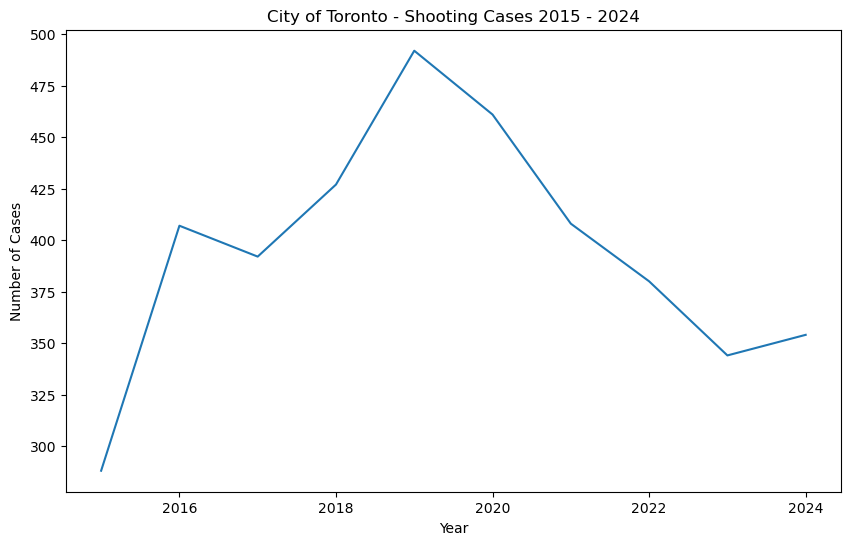

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['OCC_YEAR'], grouped_df['Case_Count_2015-2024'])

plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.title('City of Toronto - Shooting Cases 2015 - 2024')
plt.show();


- Top 3 most by year and neighbour (shooting data)

In [18]:
# neibourcount
grouped_df_total = df.groupby(['NEIGHBOURHOOD_158']).size().reset_index(name='Case_Count_2015-2024')

In [19]:
grouped_df_total.sort_values(by=['Case_Count_2015-2024'], ascending=False)

NEIGHBOURHOOD_158  Case_Count_2015-2024
53             Glenfield-Jane Heights (25)                   200
93   Mount Olive-Silverstone-Jamestown (2)                   126
15                        Black Creek (24)                   124
153           York University Heights (27)                    83
137             West Humber-Clairville (1)                    79
..                                     ...                   ...
86                      Markland Wood (12)                     2
94                Mount Pleasant East (99)                     2
75                     Kingsway South (15)                     2
152                    Yonge-St.Clair (97)                     1
79               Lawrence Park North (105)                     1

[155 rows x 2 columns]

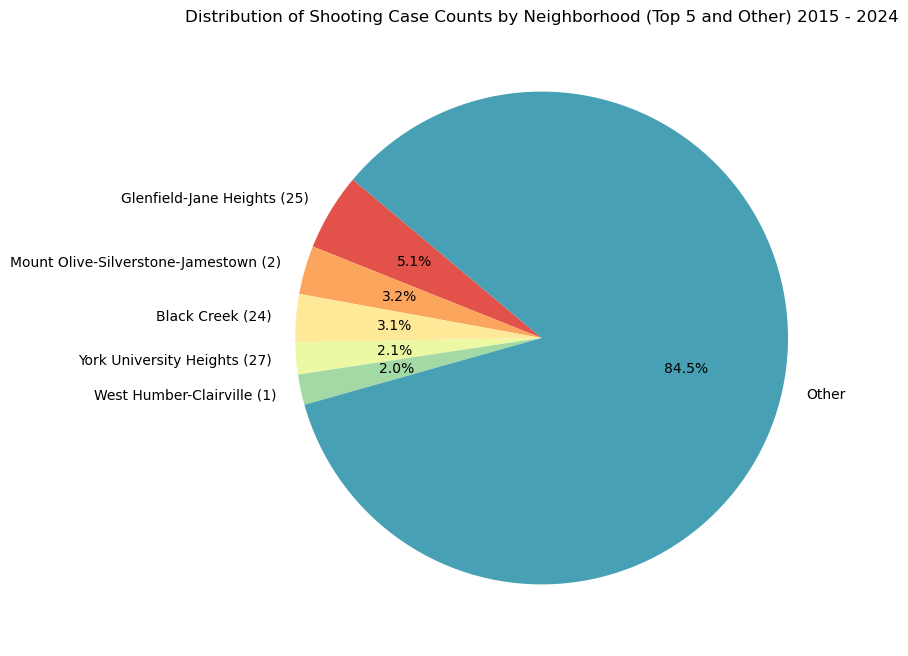

In [20]:
top_neighborhoods = grouped_df_total.nlargest(5, 'Case_Count_2015-2024')

# Calculate the total case count for the remaining neighborhoods
other_total_cases = grouped_df_total['Case_Count_2015-2024'].sum() - top_neighborhoods['Case_Count_2015-2024'].sum()

# Combine the top 5 and other neighborhoods into a new DataFrame
pie_data = pd.concat([top_neighborhoods, pd.DataFrame({'NEIGHBOURHOOD_158': ['Other'], 'Case_Count_2015-2024': [other_total_cases]})])

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(pie_data['Case_Count_2015-2024'], labels=pie_data['NEIGHBOURHOOD_158'],  autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Spectral'))
plt.title('Distribution of Shooting Case Counts by Neighborhood (Top 5 and Other) 2015 - 2024')
plt.show();

In [21]:
grouped_df = df.groupby(['OCC_YEAR', 'NEIGHBOURHOOD_158']).size().reset_index(name='Case_Count')

In [22]:
grouped_df

OCC_YEAR              NEIGHBOURHOOD_158  Case_Count
0         2015           Bayview Village (52)           1
1         2015  Beechborough-Greenbrook (112)           5
2         2015      Bendale-Glen Andrew (156)           1
3         2015               Black Creek (24)          12
4         2015               Blake-Jones (69)           1
...        ...                            ...         ...
1114      2024          Woodbine-Lumsden (60)           3
1115      2024                  Wychwood (94)           1
1116      2024           Yonge-Eglinton (100)           1
1117      2024   York University Heights (27)           7
1118      2024        Yorkdale-Glen Park (31)           5

[1119 rows x 3 columns]

In [23]:
sorted_df = grouped_df.sort_values(by=['OCC_YEAR', 'Case_Count'], ascending=[True, False])
result_df_danger = sorted_df.groupby('OCC_YEAR').apply(lambda x: x.head(3))
# result_df_safe = sorted_df.groupby('OCC_YEAR').apply(lambda x: x.tail(10))


In [24]:
result_df_danger

OCC_YEAR                      NEIGHBOURHOOD_158  Case_Count
OCC_YEAR                                                                  
2015     27        2015            Glenfield-Jane Heights (25)          16
         3         2015                       Black Creek (24)          12
         61        2015                         Oakridge (121)          12
2016     131       2016            Glenfield-Jane Heights (25)          23
         144       2016      Kingsview Village-The Westway (6)          17
         104       2016                       Black Creek (24)          16
2017     238       2017            Glenfield-Jane Heights (25)          20
         212       2017                       Black Creek (24)          13
         229       2017                    Eglinton East (138)          12
2018     345       2018            Glenfield-Jane Heights (25)          24
         378       2018  Mount Olive-Silverstone-Jamestown (2)          17
         315       2018                       Black Creek (24)          16
2019     467       2019            Glenfield-Jane Heights (25)          31
         545       2019                Yorkdale-Glen Park (31)          17
         499       2019  Mount Olive-Silverstone-Jamestown (2)          15
2020     585       2020            Glenfield-Jane Heights (25)          33
         557       2020                       Black Creek (24)          19
         613       2020  Mount Olive-Silverstone-Jamestown (2)          18
2021     699       2021            Glenfield-Jane Heights (25)          17
         672       2021                       Black Creek (24)          15
         773       2021           York University Heights (27)          14
2022     895       2022           York University Heights (27)          14
         786       2022                       Black Creek (24)          11
         817       2022            Glenfield-Jane Heights (25)           9
2023     965       2023  Mount Olive-Silverstone-Jamestown (2)          16
         936       2023            Glenfield-Jane Heights (25)          14
         998       2023                        West Hill (136)          11
2024     1073      2024  Mount Olive-Silverstone-Jamestown (2)          17
         1110      2024                 Wexford/Maryvale (119)          14
         1048      2024            Glenfield-Jane Heights (25)          13

In [25]:
# too many safe neighbours

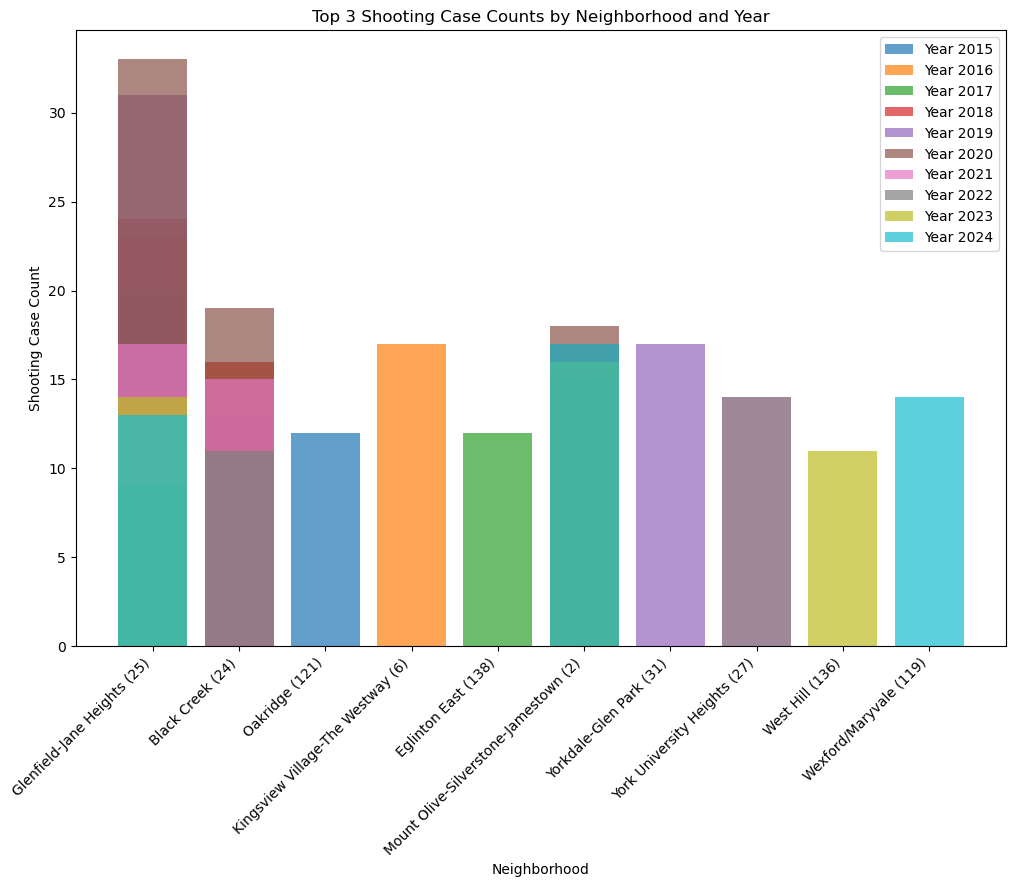

In [26]:
plt.figure(figsize=(12, 8))

for year in result_df_danger['OCC_YEAR'].unique():
    year_data = result_df_danger[result_df_danger['OCC_YEAR'] == year]
    plt.bar(year_data['NEIGHBOURHOOD_158'], year_data['Case_Count'], label=f'Year {year}', alpha=0.7)

plt.xlabel('Neighborhood')
plt.ylabel('Shooting Case Count')
plt.title('Top 3 Shooting Case Counts by Neighborhood and Year')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.show();

- Overall are shooting mostly happen in which month, time of the day (shooting data)

In [27]:
df['OCC_DATE']=pd.to_datetime(df['OCC_DATE'])

In [28]:
df.head()

OCC_DATE  OCC_YEAR OCC_MONTH   OCC_DOW  OCC_DOY  OCC_DAY  \
2451 2015-01-01 05:00:00      2015   January  Thursday        1        1   
2452 2015-01-01 05:00:00      2015   January  Thursday        1        1   
2453 2015-01-03 05:00:00      2015   January  Saturday        3        3   
2454 2015-01-05 05:00:00      2015   January    Monday        5        5   
2455 2015-01-06 05:00:00      2015   January   Tuesday        6        6   

      OCC_HOUR OCC_TIME_RANGE DIVISION  DEATH  INJURIES HOOD_158  \
2451         2          Night      D51      0         3      168   
2452         2          Night      D52      0         1      164   
2453         5          Night      D52      0         0      170   
2454        12      Afternoon      D12      0         1      111   
2455        20        Evening      D12      0         1      112   

                  NEIGHBOURHOOD_158  LONG_WGS84  LAT_WGS84  
2451      Downtown Yonge East (168)  -79.374130  43.649259  
2452         Wellington Place (164)  -79.388606  43.650407  
2453       Yonge-Bay Corridor (170)  -79.382088  43.659098  
2454        Rockcliffe-Smythe (111)  -79.481097  43.678307  
2455  Beechborough-Greenbrook (112)  -79.483274  43.693425

In [29]:
grouped_df_DOW = df.groupby(['OCC_YEAR', 'OCC_DOW']).size().reset_index(name='Case_Count')
grouped_df_DOW

OCC_YEAR    OCC_DOW  Case_Count
0       2015     Friday          39
1       2015     Monday          35
2       2015   Saturday          52
3       2015     Sunday          48
4       2015   Thursday          48
..       ...        ...         ...
65      2024   Saturday          61
66      2024     Sunday          66
67      2024   Thursday          43
68      2024    Tuesday          48
69      2024  Wednesday          39

[70 rows x 3 columns]

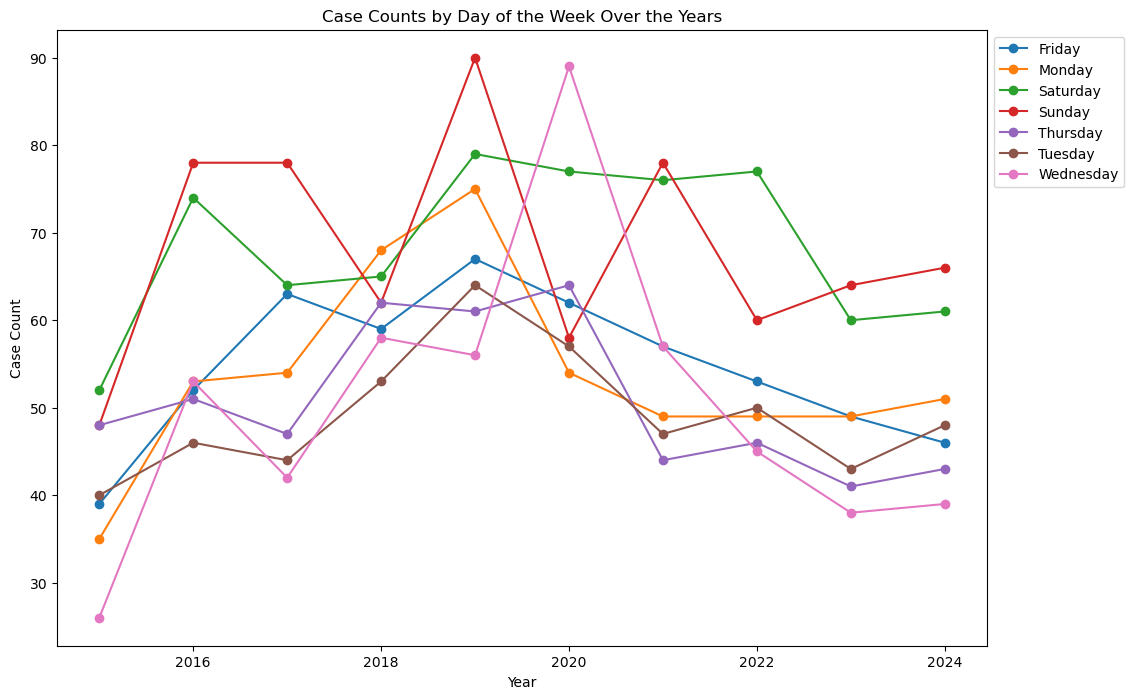

In [30]:
pivot_df_DOW = grouped_df_DOW.pivot(index='OCC_YEAR', columns='OCC_DOW', values='Case_Count')

# Plot the line chart
plt.figure(figsize=(12, 8))
for dow in pivot_df_DOW.columns:
    plt.plot(pivot_df_DOW.index, pivot_df_DOW[dow], label=dow, marker='o')

plt.xlabel('Year')
plt.ylabel('Case Count')
plt.title('Case Counts by Day of the Week Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show();

In [31]:
grouped_df_TimeRange = df.groupby(['OCC_YEAR', 'OCC_TIME_RANGE']).size().reset_index(name='Case_Count')

In [32]:
grouped_df_TimeRange

OCC_YEAR OCC_TIME_RANGE  Case_Count
0       2015      Afternoon          51
1       2015        Evening         103
2       2015        Morning          28
3       2015          Night         106
4       2016      Afternoon          60
5       2016        Evening         156
6       2016        Morning          31
7       2016          Night         160
8       2017      Afternoon          55
9       2017        Evening         166
10      2017        Morning          28
11      2017          Night         143
12      2018      Afternoon          61
13      2018        Evening         179
14      2018        Morning          29
15      2018          Night         158
16      2019      Afternoon          84
17      2019        Evening         205
18      2019        Morning          31
19      2019          Night         172
20      2020      Afternoon          69
21      2020        Evening         203
22      2020        Morning          35
23      2020          Night         154
24      2021      Afternoon          63
25      2021        Evening         161
26      2021        Morning          26
27      2021          Night         158
28      2022      Afternoon          66
29      2022        Evening         135
30      2022        Morning          27
31      2022          Night         152
32      2023      Afternoon          64
33      2023        Evening         109
34      2023        Morning          21
35      2023          Night         150
36      2024      Afternoon          58
37      2024        Evening         140
38      2024        Morning          28
39      2024          Night         128

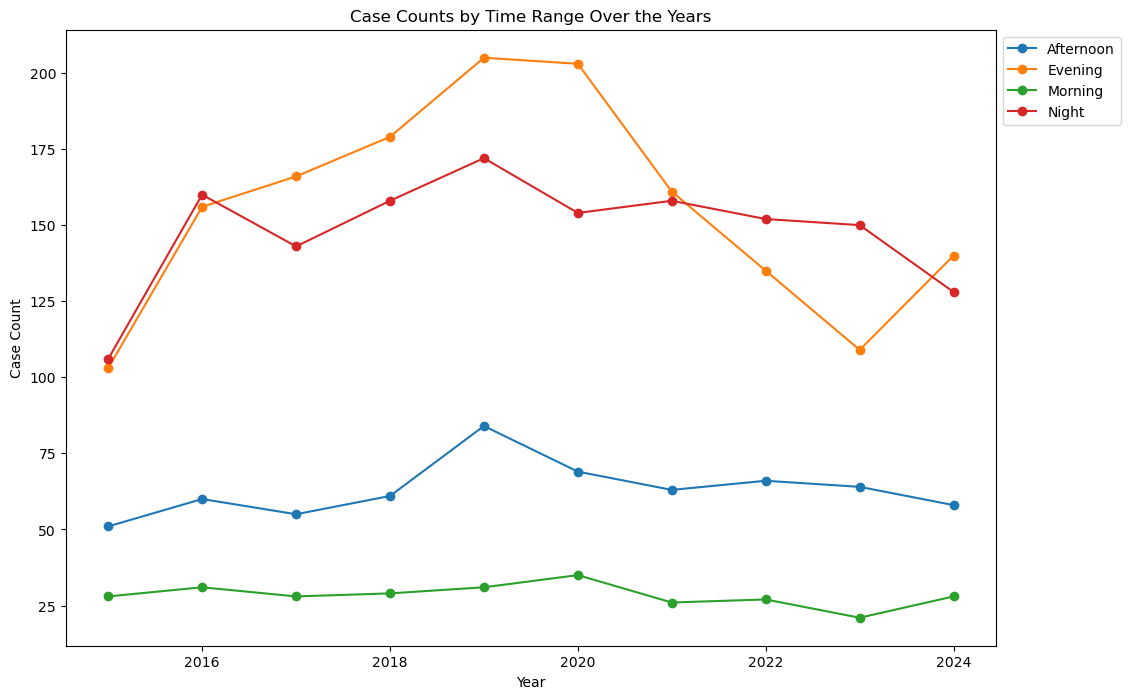

In [33]:
pivot_df_TimeRange = grouped_df_TimeRange.pivot(index='OCC_YEAR', columns='OCC_TIME_RANGE', values='Case_Count')

# Plot the line chart
plt.figure(figsize=(12, 8))
for time_range in pivot_df_TimeRange.columns:
    plt.plot(pivot_df_TimeRange.index, pivot_df_TimeRange[time_range], label=time_range, marker='o')

plt.xlabel('Year')
plt.ylabel('Case Count')
plt.title('Case Counts by Time Range Over the Years')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show();

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3953 entries, 2451 to 6408
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OCC_DATE           3953 non-null   datetime64[ns]
 1   OCC_YEAR           3953 non-null   int64         
 2   OCC_MONTH          3953 non-null   object        
 3   OCC_DOW            3953 non-null   object        
 4   OCC_DOY            3953 non-null   int64         
 5   OCC_DAY            3953 non-null   int64         
 6   OCC_HOUR           3953 non-null   int64         
 7   OCC_TIME_RANGE     3953 non-null   object        
 8   DIVISION           3953 non-null   object        
 9   DEATH              3953 non-null   int64         
 10  INJURIES           3953 non-null   int64         
 11  HOOD_158           3953 non-null   object        
 12  NEIGHBOURHOOD_158  3953 non-null   object        
 13  LONG_WGS84         3953 non-null   float64       
 14  LAT_W

### Clustering

In [35]:
incident_counts = df.groupby(['NEIGHBOURHOOD_158']).size().reset_index(name='Incident_Count')

/opt/anaconda3/envs/F2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=1, random_state=42)

/opt/anaconda3/envs/F2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

/opt/anaconda3/envs/F2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

/opt/anaconda3/envs/F2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

/opt/anaconda3/envs/F2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

/opt/anaconda3/envs/F2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

/opt/anaconda3/envs/F2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

/opt/anaconda3/envs/F2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=42)

/opt/anaconda3/envs/F2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=42)

/opt/anaconda3/envs/F2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method for Optimal K')

Text(0.5, 0, 'Number of Clusters (k)')

Text(0, 0.5, 'WCSS (Within-Cluster Sum of Squares)')

([<matplotlib.axis.XTick at 0x7fec2b08a7a0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

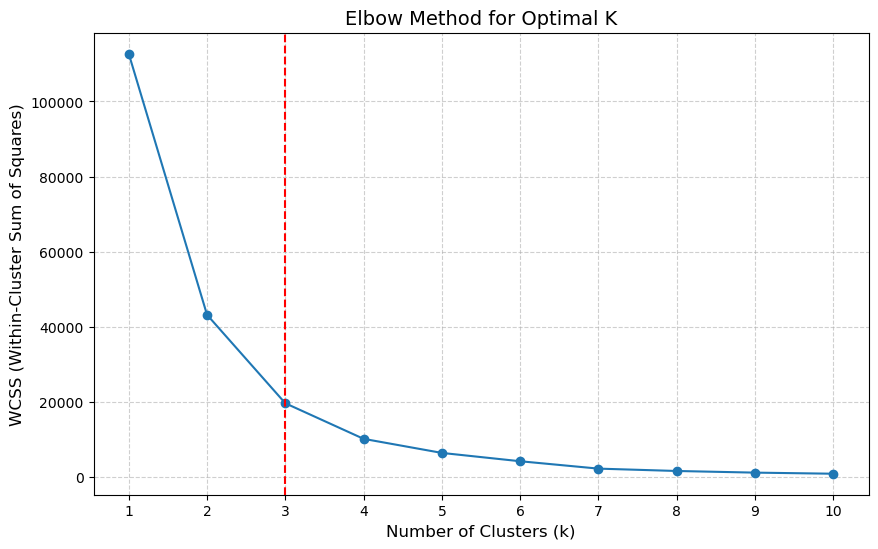

In [101]:
wcss = []  # List to store within-cluster sum of squares
K = range(1, 11)  # Testing k from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(incident_counts[['Incident_Count']])
    wcss.append(kmeans.inertia_)  # Append the WCSS for the current k

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K ', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(K)
plt.axvline(x = 3, color = 'r', label = 'optimal k',linestyle='--')
plt.show()

In [106]:
n_clusters = 4  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
incident_counts['Cluster'] = kmeans.fit_predict(incident_counts[['Incident_Count']])

silhouette_avg = silhouette_score(incident_counts[['Incident_Count']], incident_counts['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.63


/opt/anaconda3/envs/F2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
incident_counts.sort_values(by='Incident_Count', inplace=True)
print("Clustering Results:")
print(incident_counts)

Clustering Results:
                         NEIGHBOURHOOD_158  Incident_Count  Cluster
152                    Yonge-St.Clair (97)               1        1
79               Lawrence Park North (105)               1        1
23                          Casa Loma (96)               2        1
2                           Alderwood (20)               2        1
75                     Kingsway South (15)               2        1
..                                     ...             ...      ...
137             West Humber-Clairville (1)              79        0
153           York University Heights (27)              83        0
15                        Black Creek (24)             124        2
93   Mount Olive-Silverstone-Jamestown (2)             126        2
53             Glenfield-Jane Heights (25)             200        2

[155 rows x 3 columns]


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 39 artists>

<BarContainer object of 113 artists>

<BarContainer object of 3 artists>

([], [])

Text(0.5, 1.0, 'Neighborhoods Clustered by Likelihood of Crime')

Text(0.5, 0, 'Neighbourhood')

Text(0, 0.5, 'Incident Count')

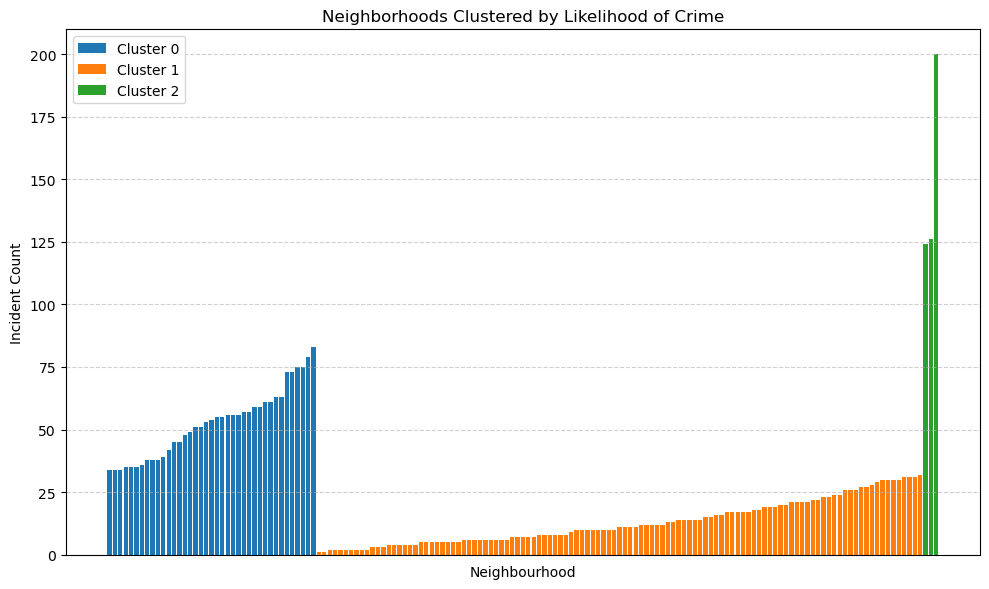

In [86]:
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = incident_counts[incident_counts['Cluster'] == cluster]
    plt.bar(cluster_data['NEIGHBOURHOOD_158'], cluster_data['Incident_Count'], label=f"Cluster {cluster}")
plt.xticks([]) 
plt.title("Neighborhoods Clustered by Likelihood of Crime")
plt.xlabel("Neighbourhood")
plt.ylabel("Incident Count")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [89]:
incident_counts[incident_counts['Cluster']==2]


NEIGHBOURHOOD_158  Incident_Count  Cluster
15                       Black Creek (24)             124        2
93  Mount Olive-Silverstone-Jamestown (2)             126        2
53            Glenfield-Jane Heights (25)             200        2

In [88]:
incident_counts[incident_counts['Cluster']==1]

NEIGHBOURHOOD_158  Incident_Count  Cluster
152                 Yonge-St.Clair (97)               1        1
79            Lawrence Park North (105)               1        1
23                       Casa Loma (96)               2        1
2                        Alderwood (20)               2        1
75                  Kingsway South (15)               2        1
..                                  ...             ...      ...
127        Tam O'Shanter-Sullivan (118)              30        1
11        Beechborough-Greenbrook (112)              31        1
1    Agincourt South-Malvern West (128)              31        1
119           Scarborough Village (139)              31        1
121                 South Parkdale (85)              32        1

[113 rows x 3 columns]

In [99]:
cluster_stats = incident_counts.groupby('Cluster')['Incident_Count'].agg(['count', 'mean','max','min'])
cluster_stats

count        mean  max  min
Cluster                             
0           39   52.564103   83   34
1          113   12.858407   32    1
2            3  150.000000  200  124

In [62]:
df1=df[['OCC_MONTH', 'NEIGHBOURHOOD_158', 'OCC_TIME_RANGE']]
# df1['DOW_TIME']=df[['OCC_DOW', 'OCC_TIME_RANGE']].agg('-'.join, axis=1)

In [63]:
agg_dow_time = df.groupby(['OCC_DOW', 'OCC_TIME_RANGE']).size().reset_index(name='Incident_Count')
agg_dow_time

OCC_DOW OCC_TIME_RANGE  Incident_Count
0      Friday      Afternoon              99
1      Friday        Evening             213
2      Friday        Morning              33
3      Friday          Night             202
4      Monday      Afternoon              90
5      Monday        Evening             220
6      Monday        Morning              38
7      Monday          Night             189
8    Saturday      Afternoon             102
9    Saturday        Evening             222
10   Saturday        Morning              43
11   Saturday          Night             318
12     Sunday      Afternoon             104
13     Sunday        Evening             210
14     Sunday        Morning              59
15     Sunday          Night             309
16   Thursday      Afternoon              74
17   Thursday        Evening             230
18   Thursday        Morning              45
19   Thursday          Night             158
20    Tuesday      Afternoon              83
21    Tuesday        Evening             220
22    Tuesday        Morning              31
23    Tuesday          Night             158
24  Wednesday      Afternoon              79
25  Wednesday        Evening             242
26  Wednesday        Morning              35
27  Wednesday          Night             147

In [64]:
encoded_features = pd.get_dummies(agg_dow_time[['OCC_DOW', 'OCC_TIME_RANGE']], drop_first=True)
encoded_features['Incident_Count'] = agg_dow_time['Incident_Count']

In [109]:
n_clusters = 6  # Set the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
agg_dow_time['Cluster'] = kmeans.fit_predict(encoded_features)

silhouette_avg = silhouette_score(encoded_features, agg_dow_time['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.64


/opt/anaconda3/envs/F2023/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [87]:
agg_dow_time

OCC_DOW OCC_TIME_RANGE  Incident_Count  Cluster
0      Friday      Afternoon              99        3
1      Friday        Evening             213        2
2      Friday        Morning              33        0
3      Friday          Night             202        2
4      Monday      Afternoon              90        3
5      Monday        Evening             220        2
6      Monday        Morning              38        0
7      Monday          Night             189        2
8    Saturday      Afternoon             102        3
9    Saturday        Evening             222        2
10   Saturday        Morning              43        0
11   Saturday          Night             318        4
12     Sunday      Afternoon             104        3
13     Sunday        Evening             210        2
14     Sunday        Morning              59        0
15     Sunday          Night             309        4
16   Thursday      Afternoon              74        3
17   Thursday        Evening             230        2
18   Thursday        Morning              45        0
19   Thursday          Night             158        1
20    Tuesday      Afternoon              83        3
21    Tuesday        Evening             220        2
22    Tuesday        Morning              31        0
23    Tuesday          Night             158        1
24  Wednesday      Afternoon              79        3
25  Wednesday        Evening             242        2
26  Wednesday        Morning              35        0
27  Wednesday          Night             147        1

<Figure size 1200x800 with 0 Axes>

Text(0.5, 1.0, 'Clusters by Day of the Week and Time Range')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Time Range')

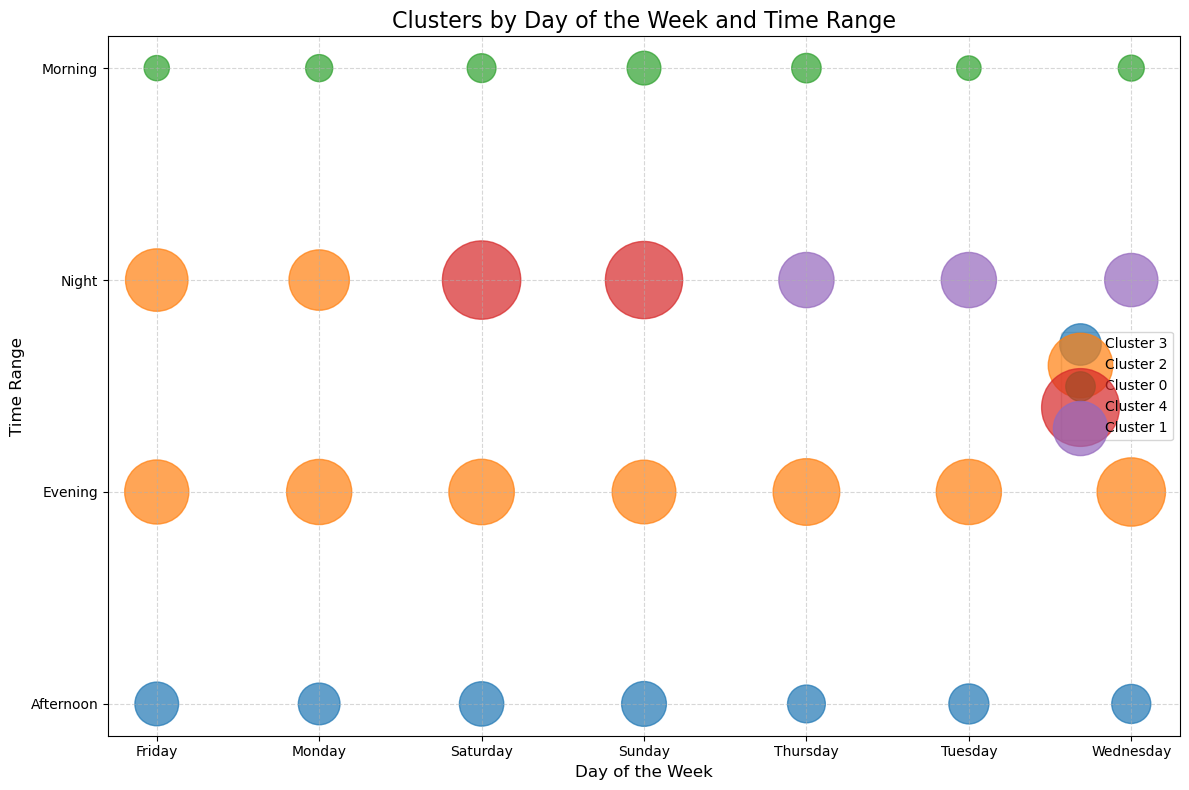

In [66]:
plt.figure(figsize=(12, 8))

for cluster in agg_dow_time['Cluster'].unique():
    cluster_data = agg_dow_time[agg_dow_time['Cluster'] == cluster]
    plt.scatter(cluster_data['OCC_DOW'], cluster_data['OCC_TIME_RANGE'],
                s=cluster_data['Incident_Count'] * 10,  # Scale by incident count
                label=f'Cluster {cluster}', alpha=0.7)

plt.title("Clusters by Day of the Week and Time Range", fontsize=16)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Time Range", fontsize=12)
plt.grid(alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


In [70]:
df.head()

OCC_DATE  OCC_YEAR OCC_MONTH   OCC_DOW  OCC_DOY  OCC_DAY  \
2451 2015-01-01 05:00:00      2015   January  Thursday        1        1   
2452 2015-01-01 05:00:00      2015   January  Thursday        1        1   
2453 2015-01-03 05:00:00      2015   January  Saturday        3        3   
2454 2015-01-05 05:00:00      2015   January    Monday        5        5   
2455 2015-01-06 05:00:00      2015   January   Tuesday        6        6   

      OCC_HOUR OCC_TIME_RANGE DIVISION  DEATH  INJURIES HOOD_158  \
2451         2          Night      D51      0         3      168   
2452         2          Night      D52      0         1      164   
2453         5          Night      D52      0         0      170   
2454        12      Afternoon      D12      0         1      111   
2455        20        Evening      D12      0         1      112   

                  NEIGHBOURHOOD_158  LONG_WGS84  LAT_WGS84  
2451      Downtown Yonge East (168)  -79.374130  43.649259  
2452         Wellington Place (164)  -79.388606  43.650407  
2453       Yonge-Bay Corridor (170)  -79.382088  43.659098  
2454        Rockcliffe-Smythe (111)  -79.481097  43.678307  
2455  Beechborough-Greenbrook (112)  -79.483274  43.693425

### Mapping

In [71]:
map_data = df.groupby(['NEIGHBOURHOOD_158', 'LONG_WGS84', 'LAT_WGS84']).size().reset_index(name='Incident_Count')

In [72]:
map_data

NEIGHBOURHOOD_158  LONG_WGS84  LAT_WGS84  Incident_Count
0       Agincourt North (129)  -79.284730  43.800069               1
1       Agincourt North (129)  -79.271048  43.793113               1
2       Agincourt North (129)  -79.270961  43.810980               4
3       Agincourt North (129)  -79.266490  43.813121               1
4       Agincourt North (129)  -79.264985  43.810598               1
...                       ...         ...        ...             ...
2241  Yorkdale-Glen Park (31)  -79.446507  43.715615               1
2242  Yorkdale-Glen Park (31)  -79.445900  43.719893               5
2243  Yorkdale-Glen Park (31)  -79.445189  43.712451               1
2244  Yorkdale-Glen Park (31)  -79.443783  43.709000               5
2245  Yorkdale-Glen Park (31)  -79.442711  43.706330               1

[2246 rows x 4 columns]

In [80]:
map_toronto = folium.Map(location=[43.7, -79.4], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map_toronto)

for _, row in map_data.iterrows():
    folium.CircleMarker(
        location=[row['LAT_WGS84'], row['LONG_WGS84']],
        radius=row['Incident_Count'] / 2,  # Scale radius by incident count
        popup=folium.Popup(f"Neighbourhood: {row['NEIGHBOURHOOD_158']}<br>Incident Count: {row['Incident_Count']}", max_width=200),
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(marker_cluster)

In [81]:
map_toronto